In [1]:
%run DMD_functions.ipynb

**Umjetni primjer**

In [2]:
N=300
m=10
x=np.random.rand(N)
A=np.random.rand(N,N)
A = A/np.linalg.norm(A, 2)

In [3]:
X=np.empty((N,m+1))
X[:,0]=x
for i in range(m):
    X[:,i+1]=A@X[:,i]
X=X+np.random.rand(N,m+1)/N

In [4]:
Z, L = DMD(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)

L

array([ 0.99872292+0.j        ,  0.56814144+0.62021374j,
        0.56814144-0.62021374j, -0.06700701+0.81240797j,
       -0.06700701-0.81240797j,  0.03156266+0.j        ,
        0.00421526+0.j        , -0.77191381+0.j        ,
       -0.58562525+0.51850151j, -0.58562525-0.51850151j])

In [5]:
#permutirani podaci - druge eigenvalues - kao što bi i očekivali!
print(X[:5,[1,6,8,9]])
temp=X[:,[1,6,8,9]]
X[:,[6,9]] = temp[:,[0,2]]
X[:,[1,8]] = temp[:,[1,3]]
print(X[:5,[1,6,8,9]])

Z_perm, L_perm = DMD(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)

L_perm


[[0.53661207 0.53127846 0.52986949 0.5284129 ]
 [0.52072354 0.52616302 0.52422718 0.52419602]
 [0.49827265 0.50430628 0.50367295 0.50048408]
 [0.50383573 0.50234396 0.50319094 0.50340459]
 [0.5079085  0.50938212 0.50918405 0.50812191]]
[[0.53127846 0.53661207 0.5284129  0.52986949]
 [0.52616302 0.52072354 0.52419602 0.52422718]
 [0.50430628 0.49827265 0.50048408 0.50367295]
 [0.50234396 0.50383573 0.50340459 0.50319094]
 [0.50938212 0.5079085  0.50812191 0.50918405]]


array([ 9.98832684e-01+0.j        ,  6.24653618e-01+0.62447381j,
        6.24653618e-01-0.62447381j,  5.37995649e-03+0.78233812j,
        5.37995649e-03-0.78233812j, -3.11699946e-04+0.j        ,
       -4.75149766e-01+0.55405456j, -4.75149766e-01-0.55405456j,
       -5.79398717e-01+0.19169907j, -5.79398717e-01-0.19169907j])

In [6]:
Ze, Le = DMD_exact(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)
Le
#isto kao L?

array([ 9.98832684e-01+0.j        ,  6.24653618e-01+0.62447381j,
        6.24653618e-01-0.62447381j,  5.37995649e-03+0.78233812j,
        5.37995649e-03-0.78233812j, -3.11699946e-04+0.j        ,
       -4.75149766e-01+0.55405456j, -4.75149766e-01-0.55405456j,
       -5.79398717e-01+0.19169907j, -5.79398717e-01-0.19169907j])

In [7]:
Zg, Lg, rg = GEDMD(X[:,:m], X[:,1:], N*np.finfo(float).resolution)
Lg

array([ 9.98832684e-01+0.j        ,  6.24653618e-01+0.62447381j,
        6.24653618e-01-0.62447381j,  5.37995649e-03+0.78233812j,
        5.37995649e-03-0.78233812j, -3.11699946e-04+0.j        ,
       -5.79398717e-01+0.19169907j, -5.79398717e-01-0.19169907j,
       -4.75149766e-01+0.55405456j, -4.75149766e-01-0.55405456j])

In [8]:
Z_qr, L_qr, r_qr, Q, R = GEDMDQ(X, N*np.finfo(float).resolution)
print(L_qr)

B = (A@X[:,m]+np.random.rand(N)/N).reshape((-1,1))

Z_added, L_added, r_added, _,_ = DMD_added_snap(X, B, Q, R, N*np.finfo(float).resolution)
print(L_added)

#provjera.. - dobije se isto
_,L_added_direct,_,_,_ = GEDMDQ(np.concatenate((X, B), axis=1), N*np.finfo(float).resolution)
print(L_added_direct)

print(np.allclose(L_added, L_added_direct))


[ 9.98832684e-01+0.j          6.24653618e-01+0.62447381j
  6.24653618e-01-0.62447381j  5.37995649e-03+0.78233812j
  5.37995649e-03-0.78233812j -3.11699946e-04+0.j
 -5.79398717e-01+0.19169907j -5.79398717e-01-0.19169907j
 -4.75149766e-01+0.55405456j -4.75149766e-01-0.55405456j]
[ 0.99944681+0.j          0.63689267+0.54002354j  0.63689267-0.54002354j
  0.18623151+0.75101802j  0.18623151-0.75101802j  0.00326224+0.j
 -0.37242946+0.70460012j -0.37242946-0.70460012j -0.72199883+0.j
 -0.4868222 +0.2526766j  -0.4868222 -0.2526766j ]
[ 0.99944681+0.j          0.63689267+0.54002354j  0.63689267-0.54002354j
  0.18623151+0.75101802j  0.18623151-0.75101802j  0.00326224+0.j
 -0.37242946+0.70460012j -0.37242946-0.70460012j -0.72199883+0.j
 -0.4868222 +0.2526766j  -0.4868222 -0.2526766j ]
True


In [9]:
Z_qr, L_qr, r_qr, Q, R = GEDMDQ(X, N*np.finfo(float).resolution)
print(L_qr)

l=2

Z_disc, L_disc, r_disc, _,_,_ = DMD_discarding_snap(l, Q, R, N*np.finfo(float).resolution)
print(L_added)

#provjera.. - dobije se isto
_,L_discarded_direct,_,_,_ = GEDMDQ(X[:,l:], N*np.finfo(float).resolution)
print(L_added_direct)

print(np.allclose(L_added, L_added_direct))

[ 9.98832684e-01+0.j          6.24653618e-01+0.62447381j
  6.24653618e-01-0.62447381j  5.37995649e-03+0.78233812j
  5.37995649e-03-0.78233812j -3.11699946e-04+0.j
 -5.79398717e-01+0.19169907j -5.79398717e-01-0.19169907j
 -4.75149766e-01+0.55405456j -4.75149766e-01-0.55405456j]
[ 0.99944681+0.j          0.63689267+0.54002354j  0.63689267-0.54002354j
  0.18623151+0.75101802j  0.18623151-0.75101802j  0.00326224+0.j
 -0.37242946+0.70460012j -0.37242946-0.70460012j -0.72199883+0.j
 -0.4868222 +0.2526766j  -0.4868222 -0.2526766j ]
[ 0.99944681+0.j          0.63689267+0.54002354j  0.63689267-0.54002354j
  0.18623151+0.75101802j  0.18623151-0.75101802j  0.00326224+0.j
 -0.37242946+0.70460012j -0.37242946-0.70460012j -0.72199883+0.j
 -0.4868222 +0.2526766j  -0.4868222 -0.2526766j ]
True


In [10]:
np.linalg.eigvals(A)[:10]

array([ 0.99871528+0.j        ,  0.03180972+0.01401508j,
        0.03180972-0.01401508j, -0.01781079+0.02907207j,
       -0.01781079-0.02907207j,  0.03032176+0.01223854j,
        0.03032176-0.01223854j, -0.00391205+0.03283405j,
       -0.00391205-0.03283405j,  0.00611732+0.03170779j])

In [11]:
#!pip install pydmd

In [12]:
import pydmd
dmd1 = pydmd.DMD(svd_rank=10)
dmd1.fit(X[:,:m], X[:,1:])
dmd1.eigs

array([ 9.98832684e-01+0.j        ,  6.24653618e-01+0.62447381j,
        6.24653618e-01-0.62447381j,  5.37995649e-03+0.78233812j,
        5.37995649e-03-0.78233812j, -3.11699946e-04+0.j        ,
       -4.75149766e-01+0.55405456j, -4.75149766e-01-0.55405456j,
       -5.79398717e-01+0.19169907j, -5.79398717e-01-0.19169907j])

In [13]:
for i in range(dmd1.eigs.shape[0]):
    print(np.linalg.norm(dmd1.reconstructed_data[:,i]-X[:,i]))

5.8948163663404006e-15
1.0210133036617463e-14
9.704978452055419e-15
8.062691112273514e-15
1.515050480929289e-14
7.779844080914942e-15
1.0750430897792936e-14
1.1268707634826798e-14
1.6277843894627044e-14
1.442028901827471e-14


In [14]:
dmd1.reconstructed_data.shape

(300, 10)

In [15]:
#usporedi s rezultatima lin regresije...

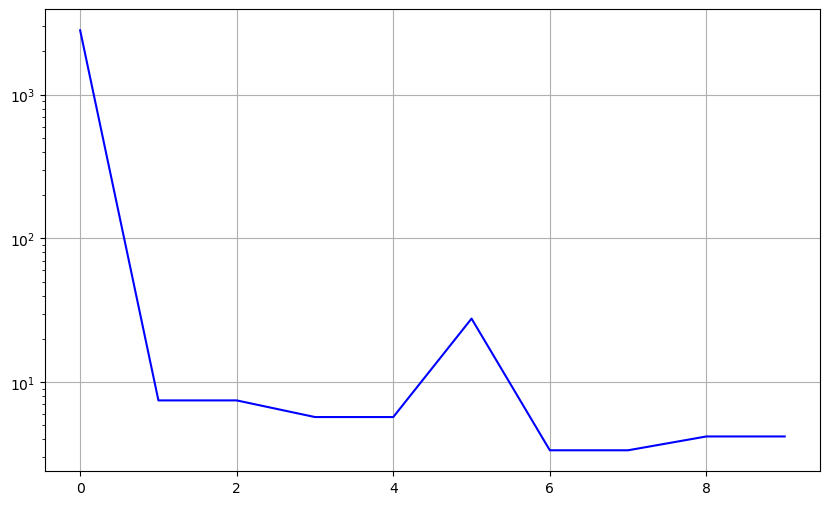

In [16]:
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(1/r_qr, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [17]:
threshold=5
indices = np.where(1/r_qr > threshold)[0]
print(indices, indices.shape)

[0 1 2 3 4 5] (6,)


In [18]:
for i in range(m):
    s=np.zeros(X.shape)
    for j in range(X.shape[1]):
        s[:,i] = DMD_reconstruction(X,Z_qr, indices, L_qr, j)
    print("norma razlike:", np.linalg.norm(s[:,i]-X[:,i]))

norma razlike: 4.989778725032931
norma razlike: 0.029265259563700276
norma razlike: 0.06831530560903255
norma razlike: 0.05879897999108151
norma razlike: 0.05051335520343199
norma razlike: 0.03908671606983473
norma razlike: 0.17992227797445925
norma razlike: 0.022190836455630924
norma razlike: 0.022589198552774695
norma razlike: 0.009368747631329163


C:\Users\dimotela\AppData\Local\Temp\ipykernel_2188\4157271458.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  s[:,i] = DMD_reconstruction(X,Z_qr, indices, L_qr, j)


*proba za funkcije...*

In [45]:
#QR za (X Y) kad X i Y imaju "istu jezgru"
N=20; m=7
A = np.random.rand(N,N)
A=A/np.linalg.norm(A)
x = np.ones((N))
X=np.empty((N,m+1))
X[:,0] = x
for i in range(m):
    X[:,i+1]= A @ X[:,i]
#print(X)

Z = np.concatenate((X[:,:m], X[:,1:]), axis=1)
print(Z.shape)

Q, R = np.linalg.qr(Z, mode="reduced")

R_12 = R[:m,m:]
R_22 = R[m:2*m, m:]

Q_1 = Q[:,:m]
Q_2 = Q[:,m:]


print(np.allclose(X[:,1:],Q_1@R_12 + Q_2@R_22))
print(np.allclose(X[:,1:],Q_1@R_12 + Q_2*R_22[:,m-1]))
print(R_22)
print(R.shape)

(20, 14)
True
True
[[ 0. -0. -0.  0. -0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.]]
(14, 14)


In [46]:
"""HH transformacija - proba s kvadratnom matricom koja skoro gornje trokutasta (dvije sporedne diag ne-nula)"""
dim_trapez_m = 6

np.set_printoptions(precision=8, suppress=True)

trapez_m = np.random.rand(dim_trapez_m,dim_trapez_m)
trapez_m = np.triu(trapez_m, -2)
print(trapez_m)
trapez_copy = trapez_m.copy()
v_all=np.empty((3,dim_trapez_m-1))
#hh1 = np.eye(dim_trapez_m, dim_trapez_m)


#HH transf od R (trapezoidalna) 
#### racun od HH matrice ("Q") bi se mogao i ovdje dogoditi - primjena transformacija na I i onda uzmemo transponirano
for i in range(dim_trapez_m-2):
    element=trapez_m[i:(i+3),i]  
    v = element.copy().reshape(-1,1) #ako stavim v=element - pokazuju na istu memoriju; ne radi!!
    v[0] = v[0] + np.sign(element[0])*np.linalg.norm(element)
    trapez_m[i:(i+3),i:] = trapez_m[i:(i+3),i:] - 2/(v.T@v)*v@(v.T@trapez_m[i:(i+3),i:])
    #hh1[i:(i+3),i:] = hh1[i:(i+3),i:] - 2/(v.T@v)*v@(v.T@hh1[i:(i+3),i:])  #- daje krivo iz nekog razloga..
    #print("hh1",hh1,sep="\n")
    v_all[:,i] = v.reshape(-1)

#predzadnji stupac
element=trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2]  
v = element.copy().reshape(-1,1)
v[0] = v[0] + np.sign(element[0])*np.linalg.norm(element)
trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] = trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] - 2/(v.T@v)*v@(v.T@trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:])
#hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] = hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] - 2/(v.T@v)*v@(v.T@hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:])
v_all[:3,dim_trapez_m-2] = np.concatenate((v.reshape(-1),[0]), axis=0)

#print("hh1_fin",hh1.T, sep="\n")

##Q - from HH matrices
hh_current = np.eye(dim_trapez_m, dim_trapez_m)
v_current=v_all[:2,-1].reshape(-1,1)
hh_current[-2:,-2:] = np.eye(2,2)-2/(v_current.T@v_current)*(v_current@v_current.T)

hh=hh_current #ovdje @ I
#print(hh)

#print(v_all)
for i in range(dim_trapez_m-3,-1,-1):
    v_current = v_all[:,i].reshape(-1,1)
    hh_current = np.eye(3,3)-2/(v_current.T@v_current)*(v_current@v_current.T)
    hh[i:i+3, :] = hh_current@hh[i:i+3, :]
    #print(hh)
print("hh_pravi",hh, sep="\n")

print(trapez_m)
print(np.allclose(hh@trapez_m,trapez_copy))
np.set_printoptions()

[[0.98920538 0.80767726 0.04154417 0.86364134 0.11265656 0.31472834]
 [0.9644896  0.73224148 0.83110231 0.64886022 0.26514759 0.56896933]
 [0.77521436 0.03773853 0.594696   0.46226886 0.43391382 0.2294295 ]
 [0.         0.11362446 0.91260447 0.4928366  0.64514135 0.21668058]
 [0.         0.         0.53997735 0.74815222 0.25257528 0.12050616]
 [0.         0.         0.         0.04276111 0.83355473 0.97054186]]
hh_pravi
[[-0.62441513 -0.39433161  0.36880592 -0.44019306  0.07416617 -0.34542723]
 [-0.60881382 -0.27707733 -0.28312101  0.47924846 -0.11244067  0.47968155]
 [-0.48933779  0.84791148 -0.11836407 -0.03455665  0.04525494 -0.15602059]
 [ 0.         -0.22085484 -0.75772699  0.05203495  0.18238621 -0.58403817]
 [ 0.          0.         -0.44233974 -0.7536495  -0.19073183  0.44717932]
 [ 0.          0.          0.         -0.06827604  0.95402574  0.29184461]]
[[-1.58421109 -0.96859152 -0.82293461 -1.16051141 -0.44410041 -0.65518605]
 [-0.         -0.51447577  0.05603466 -0.23722782 

In [47]:
#test hh fje
N0=7; N=2
l=N0-N
trapez_m = np.random.rand(N0,N)
trapez_m = np.triu(trapez_m, -l)
trapez_copy=trapez_m.copy()
np.set_printoptions(precision=5, suppress=True)
print(trapez_m)

hh, R,_ = householder_for_dmd(trapez_m, l)
print(R)
print(np.allclose(hh@R, trapez_copy))

np.set_printoptions()

[[0.43095 0.2774 ]
 [0.36064 0.86425]
 [0.5942  0.41578]
 [0.91904 0.71336]
 [0.1143  0.15826]
 [0.03327 0.31017]
 [0.      0.21323]]
[[-1.23599 -1.1022 ]
 [ 0.      -0.67639]
 [ 0.      -0.     ]
 [ 0.      -0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]]
True
